# Downloading Data Using yfinance
<hr style="border: 2px solid blue">

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_ta as ta
import plotly.graph_objects as go
import plotly.io
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

from utils import plot_stock_ta

In [9]:
# Choose a stock and date range to download data, using AAPL as an example

# YTD data for AAPL
ticker = "AAPL"

data = yf.download(ticker, start="2024-01-01", end="2024-08-18")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,184.938217,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.553482,58414500
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.222321,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.495087,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,184.858521,59144500
...,...,...,...,...,...,...
2024-08-12,216.070007,219.509995,215.600006,217.529999,217.529999,38028100
2024-08-13,219.009995,221.889999,219.009995,221.270004,221.270004,44155300
2024-08-14,220.570007,223.029999,219.699997,221.720001,221.720001,41960600


In [40]:
def plot_stock_ta(ticker:str, start_date:str="2024-01-01", end_date:str="2024-08-18") -> None:
    """Plot a given asset's price action between specified dates. Also includes: Bollinger Bands, 20/50/100 Day Moving Averages, 
    and subplot showing the RSI - a measure of whether a stock is over-bought or over-sold

    Args:
    -------------------
    ticker:str | uppercase string that matches the stock abbreviation for the asset of interest
    start_date:str | starting date of analysis
    end_date:str | ending date of analysis

    Returns:
    -------------------
    None: plotly.graph_objects.Figure | a plotly figure with 2 subplots, one showing price action and technical indicators, the other RSI
    
    ex: plot_stock_ta("GOOGL", "2024-01-01", "2024-08-01")
    """
    

    data = yf.download(ticker, start=start_date, end=end_date)

    # Create different technical indicators
    data["50-Day MA"] = data["Close"].rolling(50).mean()
    data["100-Day MA"] = data["Close"].rolling(100).mean()
    
    bollingers = ta.bbands(data["Close"], length=20).iloc[:, 0:3]
    data["lower_bb"], data["simple_moving_average"], data["upper_bb"] = bollingers.iloc[:, 0], bollingers.iloc[:, 1], bollingers.iloc[:, 2]
    data["rsi"] = ta.rsi(data["Close"], length=14)
    
    
    # Plot code
    fig = make_subplots(rows=2, cols=1, row_heights=[.7, .3], subplot_titles=[f"{ticker} Price Action (Daily Freq)", f"{ticker} RSI"], 
                        vertical_spacing=.1, shared_xaxes=True)
    candles = go.Candlestick(x=data.index, open=data["Open"], close=data["Close"], high=data["High"], 
                                 low=data["Low"], name="Daily Candle")
    
    fig.add_trace(candles, row=1, col=1)
    
    fig.add_trace(go.Scatter(x=data.index, y=data["rsi"], name="Relative Strength Index"), row=2, col=1)
    
    colors = ["violet", "lightblue"]
    styles = ["solid", "dot"]
    widths = [.5, 1]
    
    # Bollinger Band Plots
    for idx, col in enumerate(["lower_bb", "simple_moving_average", "upper_bb"]):
        fig.add_trace(go.Scatter(x=data.index, y=data[col], name=col.replace("_", " ")[:-3].title() + " BB",
                                line={"color":colors[idx%2], "width":widths[idx%2], "dash":styles[idx%2]}), row=1, col=1)

    ma_colors = ["royalblue", "yellow"]
    for idx, col in enumerate(["50-Day MA", "100-Day MA"]):
        fig.add_trace(go.Scatter(x=data.index, y=data[col], name=col,
                                line={"color":ma_colors[idx%2], "width":.5, "dash":"dash"}), row=1, col=1)
    
    fig.update_layout(
        title = {"text":f"{ticker} Technical Analysis", "x":0.05, "font_size":30},
        yaxis_title = "Price",
        xaxis2 = {"title":"Date"},
        height=800,
        template="plotly_dark",
        xaxis_rangeslider_visible = False
    )
    
    limits = [30, 70]
    
    for lim in limits:
        fig.add_trace(go.Scatter(x=data.index, y = np.array([lim for i in range(len(data.index))]), line={"color":"gray", "dash":"dash"},
                                 name=f"{lim} RSI", showlegend=False), row=2, col=1)
    
    fig.update_layout(yaxis2={"range":[0, 100]})
        
    
    return fig

[*********************100%%**********************]  1 of 1 completed


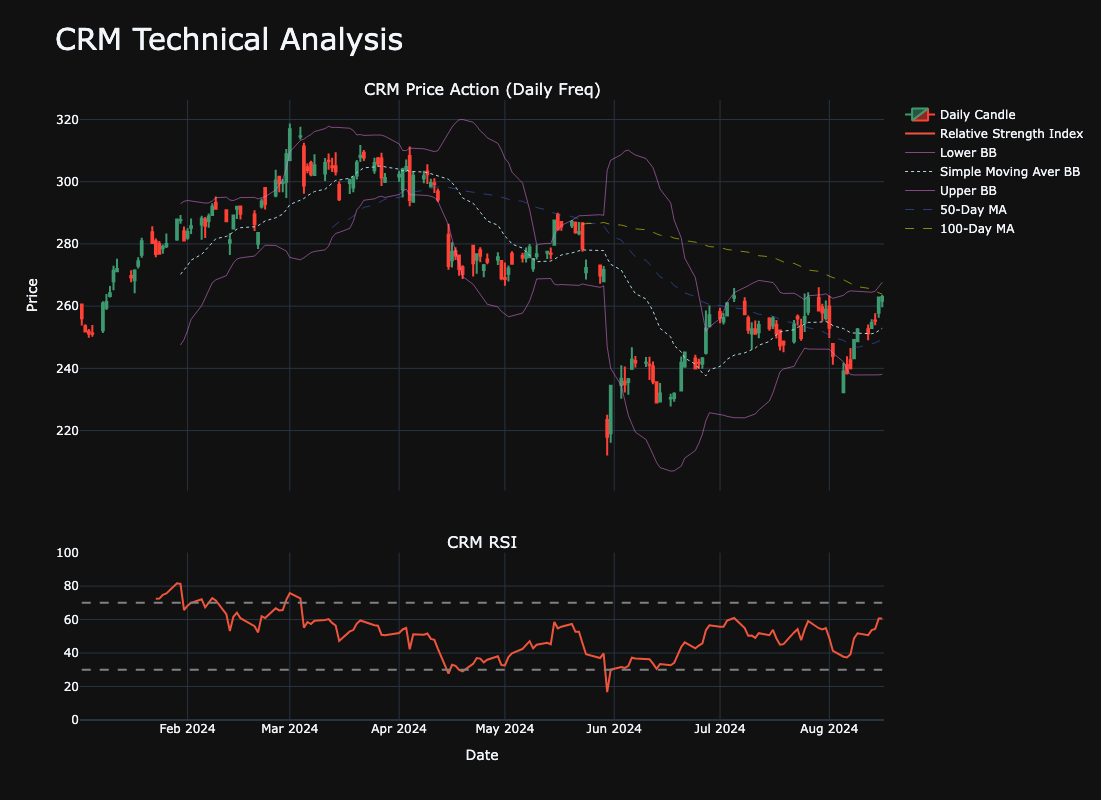

In [39]:
# COST, AAPL, CRM

# Sold on 08/19/2024:
# AAPL - 225.65
# COST - 871.96
# CRM - 264.73

plot_stock_ta("CRM")